In [38]:
# import itertools
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import trange, tqdm
np.random.seed(22)
from numpy import mean
from numpy import std
from math import sqrt

from scipy import stats
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, jaccard_similarity_score, f1_score, log_loss, accuracy_score
from collections import Counter
import warnings

In [39]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.columns = train_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
test_data.columns = test_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
train_data.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [40]:
train_data.shape

(550068, 12)

In [41]:
train_data.isnull().sum()

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64

In [42]:
test_data.isnull().sum()

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2             72344
product_category_3            162562
dtype: int64

In [43]:
train_data.dtypes

user_id                         int64
product_id                     object
gender                         object
age                            object
occupation                      int64
city_category                  object
stay_in_current_city_years     object
marital_status                  int64
product_category_1              int64
product_category_2            float64
product_category_3            float64
purchase                        int64
dtype: object

In [44]:
train_data.nunique()

user_id                        5891
product_id                     3631
gender                            2
age                               7
occupation                       21
city_category                     3
stay_in_current_city_years        5
marital_status                    2
product_category_1               20
product_category_2               17
product_category_3               15
purchase                      18105
dtype: int64

In [45]:
train_data['product_category_2'].fillna(9999, inplace = True)
test_data['product_category_2'].fillna(9999, inplace = True)
train_data['product_category_3'].fillna(9999, inplace = True)
test_data['product_category_3'].fillna(9999, inplace = True)

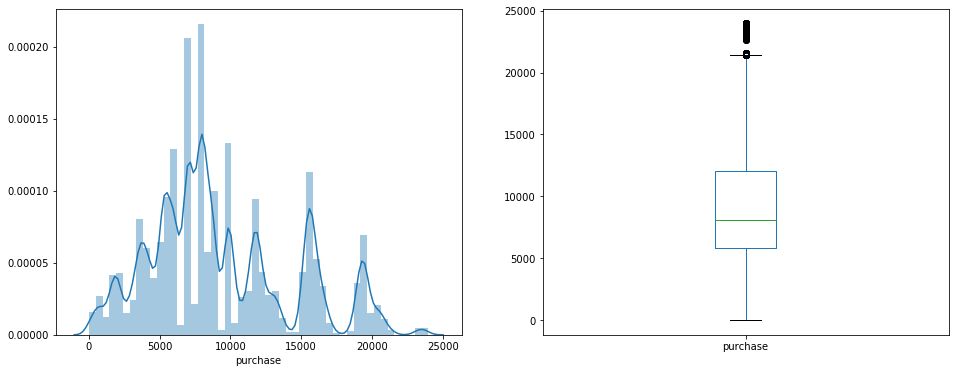

In [46]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data["purchase"]);

plt.subplot(122)
train_data["purchase"].plot.box(figsize=(16, 6))
plt.show()

M    414259
F    135809
Name: gender, dtype: int64


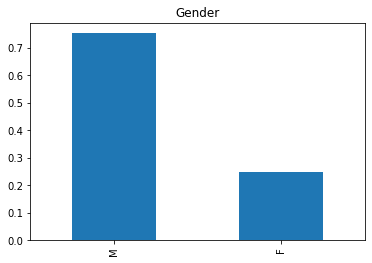

In [47]:
print(train_data["gender"].value_counts())
train_data['gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64


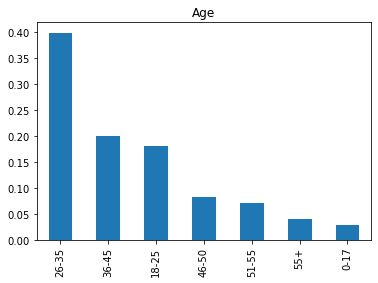

In [48]:
print(train_data["age"].value_counts())
train_data['age'].value_counts(normalize = True).plot.bar(title = 'Age')

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: stay_in_current_city_years, dtype: int64


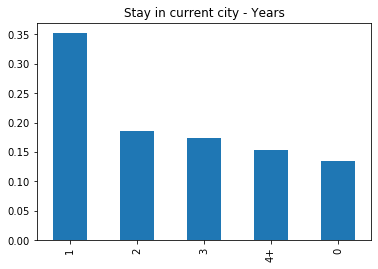

In [49]:
print(train_data["stay_in_current_city_years"].value_counts())
train_data['stay_in_current_city_years'].value_counts(normalize = True).plot.bar(title = 'Stay in current city - Years')

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: occupation, dtype: int64


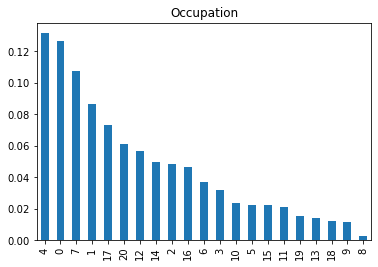

In [50]:
print(train_data["occupation"].value_counts())
train_data['occupation'].value_counts(normalize = True).plot.bar(title = 'Occupation')

B    231173
C    171175
A    147720
Name: city_category, dtype: int64


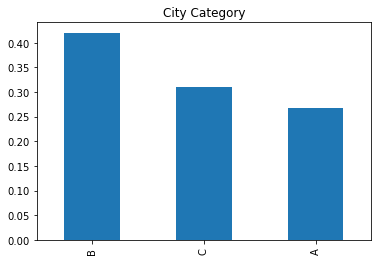

In [51]:
print(train_data["city_category"].value_counts())
train_data['city_category'].value_counts(normalize = True).plot.bar(title = 'City Category')

0    324731
1    225337
Name: marital_status, dtype: int64


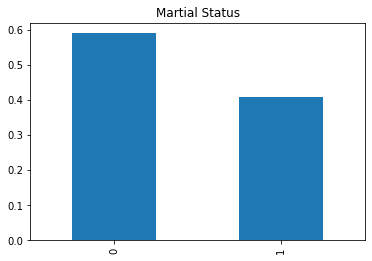

In [52]:
print(train_data["marital_status"].value_counts())
train_data['marital_status'].value_counts(normalize = True).plot.bar(title = 'Martial Status')

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: product_category_1, dtype: int64


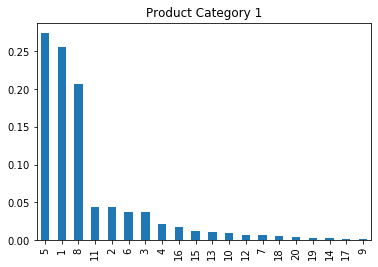

In [53]:
print(train_data["product_category_1"].value_counts())
train_data['product_category_1'].value_counts(normalize = True).plot.bar(title = 'Product Category 1')

9999.0    173638
8.0        64088
14.0       55108
2.0        49217
16.0       43255
15.0       37855
5.0        26235
4.0        25677
6.0        16466
11.0       14134
17.0       13320
13.0       10531
9.0         5693
12.0        5528
10.0        3043
3.0         2884
18.0        2770
7.0          626
Name: product_category_2, dtype: int64


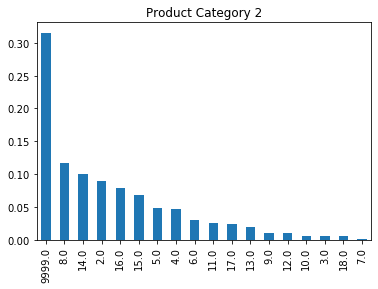

In [54]:
print(train_data["product_category_2"].value_counts())
train_data['product_category_2'].value_counts(normalize = True).plot.bar(title = 'Product Category 2')

9999.0    383247
16.0       32636
15.0       28013
14.0       18428
17.0       16702
5.0        16658
8.0        12562
9.0        11579
12.0        9246
13.0        5459
6.0         4890
18.0        4629
4.0         1875
11.0        1805
10.0        1726
3.0          613
Name: product_category_3, dtype: int64


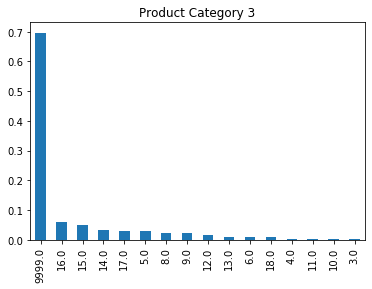

In [55]:
print(train_data["product_category_3"].value_counts())
train_data['product_category_3'].value_counts(normalize = True).plot.bar(title = 'Product Category 3')

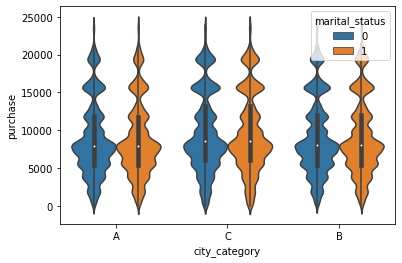

In [56]:
sns.violinplot(x = 'city_category', y = 'purchase', hue = 'marital_status', data = train_data)

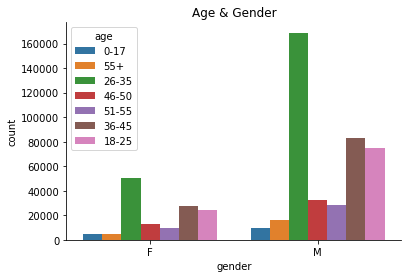

In [57]:
sns.countplot(train_data["gender"], hue = train_data["age"]).set_title("Age & Gender")
sns.despine()  

In [58]:
train_data = train_data.drop('user_id', axis = 1)

In [59]:
cat_features = ['gender', 'age', 'city_category', 'marital_status', 'stay_in_current_city_years']
df_cat = pd.get_dummies(train_data[cat_features])
train_data = train_data.drop(cat_features, axis = 1)
train_data = pd.concat([train_data, df_cat], axis = 1)

In [60]:
le = LabelEncoder()
train_data['product_id'] = le.fit_transform(train_data['product_id'])

In [61]:
train_data.head()

,product_id,occupation,product_category_1,product_category_2,product_category_3,purchase,marital_status,gender_F,gender_M,age_0-17,...,age_51-55,age_55+,city_category_A,city_category_B,city_category_C,stay_in_current_city_years_0,stay_in_current_city_years_1,stay_in_current_city_years_2,stay_in_current_city_years_3,stay_in_current_city_years_4+
0,672,10,3,9999.0,9999.0,8370,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2376,10,1,6.0,14.0,15200,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,852,10,12,9999.0,9999.0,1422,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,828,10,12,14.0,9999.0,1057,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,2734,16,8,9999.0,9999.0,7969,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [62]:
z_score = np.abs(stats.zscore(train_data))

In [63]:
train_data = train_data[(z_score <= 2).all(axis = 1)]

In [64]:
train_data.shape

(70530, 24)

In [65]:
# Dividing the data into test and train datasets
X = train_data.drop('purchase', axis = 1).values
y = train_data['purchase'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [29]:
model = GradientBoostingRegressor(n_estimators = 100)
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 22)
n_scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')


In [30]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

MAE: -2067.372 (15.063)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
test_user_id = test_data['user_id'].values
test_data = test_data.drop('user_id', axis = 1)
test_prod_id = test_data['product_id'].values

In [70]:
df_cat = pd.get_dummies(test_data[cat_features])
test_data = test_data.drop(cat_features, axis = 1)
test_data = pd.concat([test_data, df_cat], axis = 1)
test_data['product_id'] = le.fit_transform(test_data['product_id'])

In [71]:
y_pred = model.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred))

2724.7383237559247

In [72]:
test_data.head()

,product_id,occupation,product_category_1,product_category_2,product_category_3,marital_status,gender_F,gender_M,age_0-17,age_18-25,...,age_51-55,age_55+,city_category_A,city_category_B,city_category_C,stay_in_current_city_years_0,stay_in_current_city_years_1,stay_in_current_city_years_2,stay_in_current_city_years_3,stay_in_current_city_years_4+
0,1144,7,1,11.0,9999.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,994,17,3,5.0,9999.0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2672,1,5,14.0,9999.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1299,1,4,9.0,9999.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,519,1,4,5.0,12.0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [36]:
Y_Pred = model.predict(test_data)

In [74]:
submission_df = pd.DataFrame({
                  "Purchase": pd.Series(Y_Pred),
                  "User_ID": pd.Series(test_user_id),
                  "Product_ID": pd.Series(test_prod_id)})
submission_df.to_csv('submission_1_GB.csv', index = False)